I have previously done the Coursera Machine Learning exercises in Matlab.  I thought, now that I am starting to get away from Matlab and use Python more, I should re-do the exercises in Python.  This is exercise 1.

In [447]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

Part 1:  Create an eye matrix.  While this is incredibly simple, I want to make sure that I go through each step and provide a resulting document that a novice can follow long and understand what is happening.

In [448]:
A = np.identity(5)
print A

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


Part 2: Read in the data from 'ex1data1.txt' and plot it as a scatter plot

In [449]:
# Use the numpy genfromtext function to read the data
data = np.genfromtxt('/Users/matthewturner/Desktop/Coursera_machine_learning/'+
                     'machine-learning-ex1/ex1/ex1data1.txt', delimiter=',')

In [450]:
# Pull out the first column (theta0) into the variable X, and the 2nd column (theta1)
# into the variable y.  These variable names are consistent with the example.
X,y = data[:,0],data[:,1]

# Set m = the length of y (i.e., the number of observations).
m = len(y)
y = y.reshape(m,1)

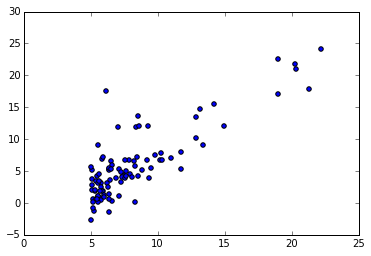

In [451]:
plt.scatter(X,y)

Part 3: Gradient Descent

In [452]:
# Add a column of ones to the data
X = np.c_[np.ones((m,1)),X]
theta = np.zeros((2,1))

iterations = 1500
alpha = 0.01

In [453]:
def costFuncIter(X,y,theta):
    cum_sum = 0
    for i in range(m):
        h = np.dot(X[i],theta) - y[i]
        cum_sum += 1.0/(2*m) * h * h
    return cum_sum
        
J = costFuncIter(X,y,theta)
print J

[ 32.07273388]


In [454]:
# Compute and display the initial cost function
def costFunc(X,y,theta):
    h = np.dot(X,theta)-y
    h2 = np.dot(h.T,h)
    J = 1./(2*m) * h2
    return J[0,0]

J = costFunc(X,y,theta)
print J

32.0727338775


In [455]:
# Run the Gradient Descent Algorithm
def gradientDescent(X,y,theta,alpha,iterations):
    J_history = np.zeros(iterations)
    
    for iter in range(iterations):
        h = np.dot(X,theta) - y
        h_X = np.dot(X.T,h)
        
        temp = theta
        
        temp -= alpha / m * h_X
        
        theta = temp
        
        J_history[iter] = costFunc(X,y,theta)
        
    return theta,J_history
    
theta, J_history = gradientDescent(X,y,theta,alpha,iterations)
print theta

[[-3.63029144]
 [ 1.16636235]]


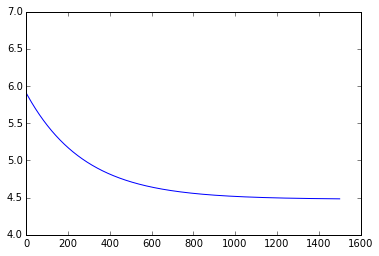

In [456]:
# Plot the timeseries of cost function
plt.plot(J_history)

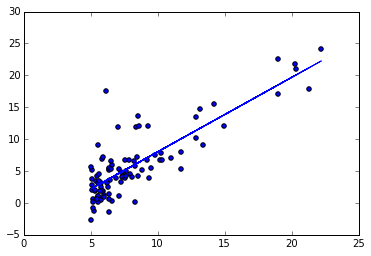

In [457]:
# Plot the observations and the best fit line that we just solved for
plt.scatter(X[:,1],y)
plt.plot(X[:,1],np.dot(X,theta))

In [458]:
# Make the 2 predictions
predict1 = np.array([1,3.5]).dot(theta)
predict2 = np.array([1,7]).dot(theta)
print predict1
print predict2

[ 0.45197679]
[ 4.53424501]


Part 3: Now we do the multi variable exercise

In [490]:
# Use the numpy genfromtext function to read the data
data2 = np.genfromtxt('/Users/matthewturner/Desktop/Coursera_machine_learning/'+
                     'machine-learning-ex1/ex1/ex1data2.txt', delimiter=',')

In [491]:
# Pull out the first column (theta0) into the variable X, and the 2nd column (theta1)
# into the variable y.  These variable names are consistent with the example.
X2,y2 = data2[:,0:2],data2[:,2]

# Set m = the length of y (i.e., the number of observations).
m2 = len(y2)
y2 = y2.reshape(m2,1)

Part 3.1:  Feature Normalization

In [492]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = ( X - mu ) / sigma
    return X_norm, mu, sigma
    
X_norm, mu, sigma = featureNormalize(X2)

In [516]:
# Add the column of ones to X2
X2 = np.c_[np.ones((m2,1)),X_norm]

Part 3.2: Gradient Descent

In [517]:
def gradientDescentMulti(X2,y2,theta2,alpha2,iterations2):
    J_history2 = np.zeros(iterations2)
    
    max1 = np.shape(X2)[1]
    alpha_over_m = alpha2 / m2
    for iter in range(iterations2):
        temp2 = theta2
        h2 = np.dot(X2,temp2.reshape(max1,1))-y2
        h3 = np.dot(X2.T,h2)
        temp2 = temp2.reshape(max1,1) - alpha_over_m * h3
        theta2 = temp2
        
        J_history2[iter] = costFunc(X2,y2,theta2)
        
    return theta2,J_history2
    
theta2 = np.zeros(np.shape(X2)[1])
alpha2 = 0.1
iterations2 = 400
    
theta2, J_history2 = gradientDescentMulti(X2,y2,theta2,alpha2,iterations2)
print theta2

[[ 340412.65957447]
 [ 109447.79558639]
 [  -6578.3539709 ]]


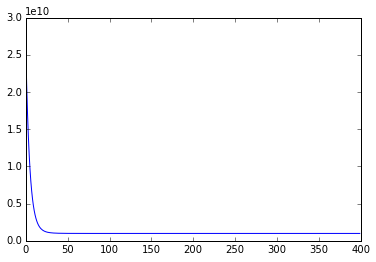

In [518]:
plt.plot(J_history2)

Part 3.3: Normal Equation

In [519]:
def normalEqn(X,y):
    pinv_X = np.linalg.pinv(np.dot(X.T,X))
    X_y = np.dot(X.T,y)
    theta = np.dot(pinv_X,X_y)
    return np.linalg.inv(X.T.dot( X )).dot( X.T ).dot( y )
    
theta3 = normalEqn(X2,y2)
print theta3

[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]


In [527]:
# Predict proce of 1650 sq foot house with 3 bedrooms
x_predict = [1650,3]
normalized_predict = (x_predict - mu)/sigma
normalized_predict = np.insert(normalized_predict,0,1)
predict3 = np.dot(normalized_predict,theta2)

print predict3

[ 293081.46452917]
